**Analyzing Forest Data Among Countries & Regions: % of land area**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# dataframe for forest data
df = pd.read_csv('/content/API_AG.LND.FRST.ZS_DS2_en_csv_v2_13350.csv', skiprows=4)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.260420,31.039682,30.824316,30.611512,30.391626,30.174252,29.955194,29.737205,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.234231,20.152610,20.071327,19.986100,19.901230,19.816784,19.732037,19.647488,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,52.536497,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN,NaN
263,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,14.025085,13.995079,NaN,NaN
264,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,60.030150,59.776969,NaN,NaN


In [3]:
# drop unneeded columns
df = df.drop(columns=['Indicator Name', 'Indicator Code'])
df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.260420,31.039682,30.824316,30.611512,30.391626,30.174252,29.955194,29.737205,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.234231,20.152610,20.071327,19.986100,19.901230,19.816784,19.732037,19.647488,NaN,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,52.536497,NaN,NaN


In [4]:
# long format dataframe
df_long = df.melt(id_vars=['Country Name', 'Country Code'],
                 var_name='Year',
                 value_name='Forest Area (% of land area)')

df_long.head()

,Country Name,Country Code,Year,Forest Area (% of land area)
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


In [5]:
# drop na values and turn into numeric
df_long['Forest Area (% of land area)'] = pd.to_numeric(df_long['Forest Area (% of land area)'], errors='coerce')
df_long = df_long.dropna(subset=['Forest Area (% of land area)'])
df_long.head()

,Country Name,Country Code,Year,Forest Area (% of land area)
7980,Aruba,ABW,1990,2.333333
7981,Africa Eastern and Southern,AFE,1990,42.975250
7982,Afghanistan,AFG,1990,1.852782
7983,Africa Western and Central,AFW,1990,22.776908
7984,Angola,AGO,1990,63.578070


In [6]:
df_long['Year'] = df_long['Year'].astype(int)

<ipython-input-6-13c982f29952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Year'] = df_long['Year'].astype(int)


In [7]:
# import country forest Metadata
meta_df = pd.read_csv('/content/Metadata_Country_API_AG.LND.FRST.ZS_DS2_en_csv_v2_13350.csv')
meta_df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [8]:
# merge df_long and meta_df based on country code to add incomegroup and region
merged_df = pd.merge(df_long, meta_df, on='Country Code')
merged_df = merged_df.drop(columns=['SpecialNotes', 'TableName','Unnamed: 5'])
merged_df

,Country Name,Country Code,Year,Forest Area (% of land area),Region,IncomeGroup
0,Aruba,ABW,1990,2.333333,Latin America & Caribbean,High income
1,Africa Eastern and Southern,AFE,1990,42.975250,NaN,NaN
2,Afghanistan,AFG,1990,1.852782,South Asia,Low income
3,Africa Western and Central,AFW,1990,22.776908,NaN,NaN
4,Angola,AGO,1990,63.578070,Sub-Saharan Africa,Lower middle income
...,...,...,...,...,...,...
8404,Samoa,WSM,2022,57.809353,East Asia & Pacific,Lower middle income
8405,"Yemen, Rep.",YEM,2022,1.039832,Middle East & North Africa,Low income
8406,South Africa,ZAF,2022,13.995079,Sub-Saharan Africa,Upper middle income
8407,Zambia,ZMB,2022,59.776969,Sub-Saharan Africa,Lower middle income


In [9]:
# check for NaN values
# turns out values in country name that had NAN for Region and IncomeGroup were wrongly placed because they are regions in country name column
# so drop all NaN values to keep only countries in Country Name
merged_df.loc[merged_df.isna().any(axis=1)]

,Country Name,Country Code,Year,Forest Area (% of land area),Region,IncomeGroup
1,Africa Eastern and Southern,AFE,1990,42.975250,NaN,NaN
3,Africa Western and Central,AFW,1990,22.776908,NaN,NaN
7,Arab World,ARB,1990,1.786077,NaN,NaN
31,Central Europe and the Baltics,CEB,1990,27.703834,NaN,NaN
44,Caribbean small states,CSS,1990,92.105033,NaN,NaN
...,...,...,...,...,...,...
8384,South Asia (IDA & IBRD),TSA,2022,18.914922,NaN,NaN
8385,Sub-Saharan Africa (IDA & IBRD countries),TSS,2022,25.916946,NaN,NaN
8393,Upper middle income,UMC,2022,28.845993,NaN,NaN
8398,"Venezuela, RB",VEN,2022,52.294972,Latin America & Caribbean,NaN


In [10]:
# drop NaN values in Region and IncomeGroup to keep only countries
merged_df = merged_df.dropna(subset=['Region', 'IncomeGroup'])

In [11]:
# use assert statement to check dataframe

# check Nan values
assert merged_df.isna().sum().sum() == 0, "NaN values still exist"

# check duplicates
assert merged_df.duplicated().sum() == 0, "Duplicates still exist"

print("NaN count:", merged_df.isna().sum().sum())
print("Duplicate count:", merged_df.duplicated().sum())

NaN count: 0
Duplicate count: 0


In [12]:
# completed and cleaned dataframe
merged_df

,Country Name,Country Code,Year,Forest Area (% of land area),Region,IncomeGroup
0,Aruba,ABW,1990,2.333333,Latin America & Caribbean,High income
2,Afghanistan,AFG,1990,1.852782,South Asia,Low income
4,Angola,AGO,1990,63.578070,Sub-Saharan Africa,Lower middle income
5,Albania,ALB,1990,28.788321,Europe & Central Asia,Upper middle income
6,Andorra,AND,1990,34.042553,Europe & Central Asia,High income
...,...,...,...,...,...,...
8404,Samoa,WSM,2022,57.809353,East Asia & Pacific,Lower middle income
8405,"Yemen, Rep.",YEM,2022,1.039832,Middle East & North Africa,Low income
8406,South Africa,ZAF,2022,13.995079,Sub-Saharan Africa,Upper middle income
8407,Zambia,ZMB,2022,59.776969,Sub-Saharan Africa,Lower middle income


In [13]:
# Summary statistics of Global Forest Area per year

# Average forest area seems to be declining overtime
# Lowest forest area is 0

year_sumstats = merged_df.groupby('Year').agg({'Forest Area (% of land area)': ['mean', 'median', 'min', 'max']})
display(year_sumstats)
print('Year with highest mean forest area: ', year_sumstats['Forest Area (% of land area)']['mean'].idxmax())
print('Year with lowest mean forest area: ', year_sumstats['Forest Area (% of land area)']['mean'].idxmin())

Forest Area (% of land area)                           
                             mean     median  min        max
Year                                                        
1990                    33.200781  29.124905  0.0  96.226381
1991                    34.062772  29.545528  0.0  95.928449
1992                    33.318033  30.222686  0.0  95.760432
1993                    33.129544  30.614305  0.0  95.737529
1994                    33.130938  30.952016  0.0  95.714627
1995                    33.086053  31.331128  0.0  95.691725
1996                    33.040982  31.710240  0.0  95.668822
1997                    32.996101  31.793161  0.0  95.645920
1998                    32.979654  31.748618  0.0  95.623018
1999                    32.934694  31.704075  0.0  95.600115
2000                    32.848243  31.659532  0.0  95.577213
2001                    32.810425  31.562167  0.0  95.551663
2002                    32.775982  31.740688  0.0  95.526112
2003                    32.736535  31.610927  0.0  95.500562
2004                    32.694564  31.279596  0.0  95.475012
2005                    32.656009  31.097271  0.0  95.449462
2006                    32.715473  31.037921  0.0  95.423912
2007                    32.688757  30.978575  0.0  95.398361
2008                    32.660104  30.781494  0.0  95.372811
2009                    32.630807  30.649576  0.0  95.347261
2010                    32.601017  30.774558  0.0  95.321711
2011                    32.270606  30.523463  0.0  95.261664
2012                    32.032810  30.290545  0.0  95.201617
2013                    31.991743  30.442858  0.0  95.141570
2014                    31.954083  30.464260  0.0  95.081523
2015                    31.918292  30.585975  0.0  95.021476
2016                    31.848963  30.814200  0.0  94.950763
2017                    31.809942  30.808792  0.0  94.905282
2018                    31.761824  30.269977  0.0  94.829024
2019                    31.709475  30.269977  0.0  94.752704
2020                    31.665885  30.269977  0.0  94.676446
2021                    31.616446  30.269977  0.0  94.600146
2022                    32.107694  31.233141  0.0  94.523874

Year with highest mean forest area:  1991
Year with lowest mean forest area:  2021


In [14]:
# Summary statistics of forest area by country OVERALL

country_sumstats = merged_df.groupby('Country Name').agg({'Forest Area (% of land area)': ['mean', 'median', 'min', 'max']})
display(country_sumstats)
print('Country with highest mean forest area: ', country_sumstats['Forest Area (% of land area)']['mean'].idxmax())
print('Country with lowest mean forest area: ', country_sumstats['Forest Area (% of land area)']['mean'].idxmin())

Forest Area (% of land area)                        \
                                              mean     median        min   
Country Name                                                               
Afghanistan                               1.852782   1.852782   1.852782   
Albania                                  28.519210  28.542701  28.076642   
Algeria                                   0.748815   0.748360   0.662961   
American Samoa                           87.783333  87.750000  85.350000   
Andorra                                  34.042553  34.042553  34.042553   
...                                            ...        ...        ...   
Virgin Islands (U.S.)                    58.328571  56.737143  52.657143   
West Bank and Gaza                        1.591656   1.587791   1.508306   
Yemen, Rep.                               1.039832   1.039832   1.039832   
Zambia                                   62.523033  63.007573  59.776969   
Zimbabwe                                 46.761174  46.761174  44.855732   

                                  
                             max  
Country Name                      
Afghanistan             1.852782  
Albania                28.802464  
Algeria                 0.826333  
American Samoa         90.350000  
Andorra                34.042553  
...                          ...  
Virgin Islands (U.S.)  70.114286  
West Bank and Gaza      1.684385  
Yemen, Rep.             1.039832  
Zambia                 63.778098  
Zimbabwe               48.666615  

[213 rows x 4 columns]

Country with highest mean forest area:  Suriname
Country with lowest mean forest area:  Gibraltar


In [15]:
# Years that had the highest/lowest forest area for each country

highest_years = merged_df.loc[
    merged_df.groupby('Country Name')['Forest Area (% of land area)'].idxmax()
][['Country Name', 'Year', 'Forest Area (% of land area)']]
print('Years with Highest Forest Area for Each Country: ')
display(highest_years)


lowest_years = merged_df.loc[
    merged_df.groupby('Country Name')['Forest Area (% of land area)'].idxmin()
][['Country Name', 'Year', 'Forest Area (% of land area)']]
print('Years with Lowest Forest Area for Each Country: ')
display(lowest_years)

Years with Highest Forest Area for Each Country: 


,Country Name,Year,Forest Area (% of land area)
2,Afghanistan,1990,1.852782
6322,Albania,2015,28.802464
8210,Algeria,2022,0.826333
10,American Samoa,1990,90.350000
6,Andorra,1990,34.042553
...,...,...,...
208,Virgin Islands (U.S.),1990,70.114286
6510,West Bank and Gaza,2015,1.684385
212,"Yemen, Rep.",1990,1.039832
214,Zambia,1990,63.778098


Years with Lowest Forest Area for Each Country: 


,Country Name,Year,Forest Area (% of land area)
2,Afghanistan,1990,1.852782
2461,Albania,2000,28.076642
2515,Algeria,2000,0.662961
8162,American Samoa,2022,85.350000
6,Andorra,1990,34.042553
...,...,...,...
5262,Virgin Islands (U.S.),2010,52.657143
161,West Bank and Gaza,1990,1.508306
212,"Yemen, Rep.",1990,1.039832
8407,Zambia,2022,59.776969


In [16]:
# 1. Global average forest area per year
global_avg_per_year = merged_df.groupby("Year")["Forest Area (% of land area)"].mean().reset_index()
print("Global Average Forest Area Over Time (in % of land area):")
print(global_avg_per_year.head())

# 2. Top 10 countries with highest forest % in 2022
top_10_2022 = merged_df[merged_df["Year"] == 2022].sort_values(
    by="Forest Area (% of land area)", ascending=False
)[["Country Name", "Forest Area (% of land area)"]].head(10)
print("\nTop 10 Countries by Forest Area (% of land area) in 2022:")
print(top_10_2022)

# 3. Bottom 10 countries with lowest forest % in 2022
bottom_10_2022 = merged_df[merged_df["Year"] == 2022].sort_values(
    by="Forest Area (% of land area)", ascending=True
)[["Country Name", "Forest Area (% of land area)"]].head(10)
print("\nBottom 10 Countries by Forest Area (% of land area) in 2022:")
print(bottom_10_2022)

# 4. Average forest area by Region in 2022
region_avg_2022 = merged_df[merged_df["Year"] == 2022].groupby("Region")["Forest Area (% of land area)"].mean().reset_index()
print("\nAverage Forest Area by Region (2022):")
print(region_avg_2022)

# 5. Average forest area by Income Group in 2022
income_avg_2022 = merged_df[merged_df["Year"] == 2022].groupby("IncomeGroup")["Forest Area (% of land area)"].mean().reset_index()
print("\nAverage Forest Area by Income Group (2022):")
print(income_avg_2022)

Global Average Forest Area Over Time (in % of land area):
   Year  Forest Area (% of land area)
0  1990                     33.200781
1  1991                     34.062772
2  1992                     33.318033
3  1993                     33.129544
4  1994                     33.130938

Top 10 Countries by Forest Area (% of land area) in 2022:
               Country Name  Forest Area (% of land area)
8364               Suriname                     94.523874
8243                 Guyana                     93.456597
8229  Micronesia, Fed. Sts.                     92.114286
8230                  Gabon                     91.228471
8333                  Palau                     90.369565
8353        Solomon Islands                     90.086102
8237      Equatorial Guinea                     86.691622
8162         American Samoa                     85.350000
8334       Papua New Guinea                     79.028176
8277                Liberia                     78.456395

Bottom 10 Countr

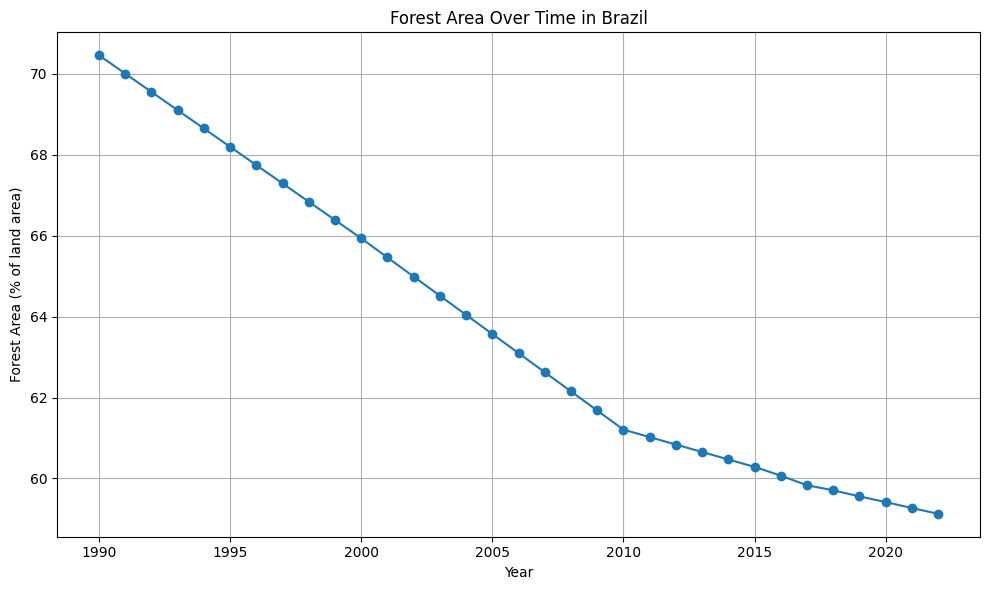

In [17]:
# Plot of Forest Area over time in Brazil
import matplotlib.pyplot as plt
import seaborn as sns

country = 'Brazil'  # change this to any country you want
country_data = merged_df[merged_df['Country Name'] == country]

plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Forest Area (% of land area)'], marker='o')
plt.title(f'Forest Area Over Time in {country}')
plt.xlabel('Year')
plt.ylabel('Forest Area (% of land area)')
plt.grid(True)
plt.tight_layout()
plt.show()

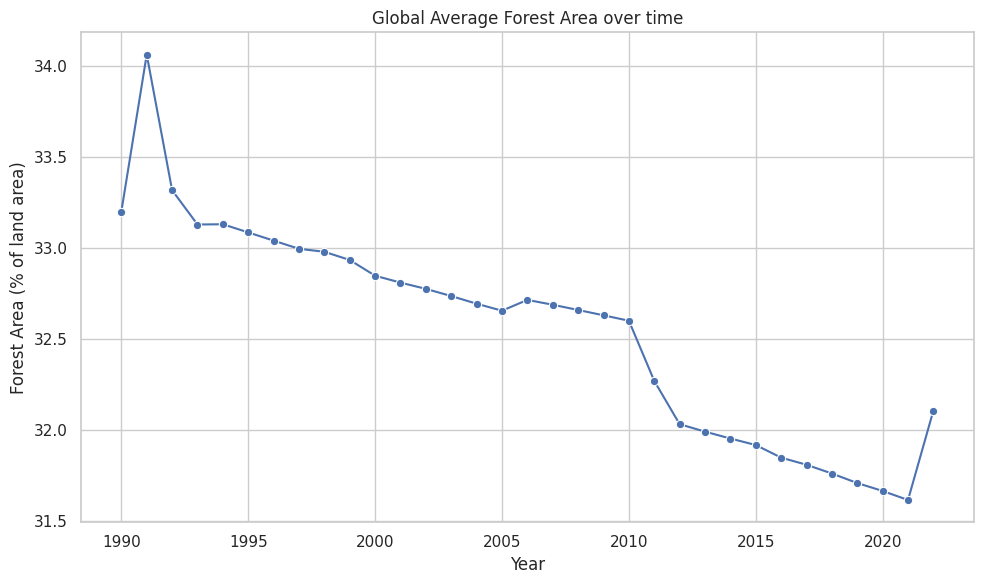

In [18]:
#| label: forest_over_time
#| fig-cap: >
#|  In the line plot showing global average forest area percentage,
#|  we can see a sharp decrease over time. This could be due to an increase of global warming, urbanization, or deforestation over time.

sns.set(style="whitegrid")

#1. Global avg forest area over time LINE PLOT
plt.figure(figsize=(10,6))
sns.lineplot(data=global_avg_per_year, x='Year', y='Forest Area (% of land area)', marker="o")
plt.title('Global Average Forest Area over time')
plt.xlabel('Year')
plt.ylabel('Forest Area (% of land area)')
plt.tight_layout()
plt.show()

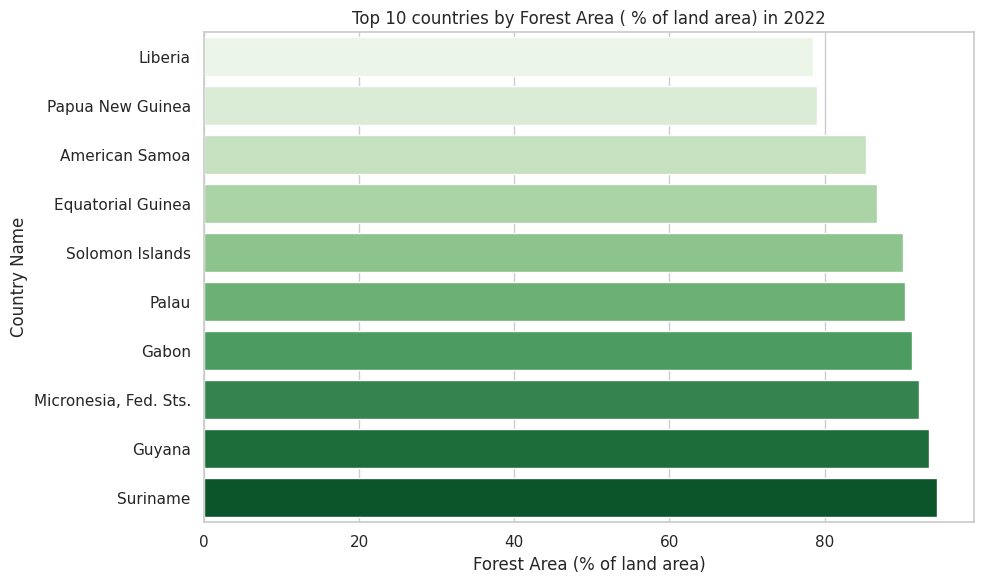

In [19]:
#| label: top_10
#| fig-cap: >
#|  This bar plot shows the 10 countries that had the highest forest area
#|  percent in the year 2022. Suriname had the highest percent of forest area in 2022.


#2. Top 10 Countries by Forest Area in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_2022.sort_values("Forest Area (% of land area)"),
            y="Country Name", x="Forest Area (% of land area)",
            hue="Country Name", palette="Greens", legend=False)
plt.title("Top 10 countries by Forest Area ( % of land area) in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Country Name")
plt.tight_layout()
plt.show()

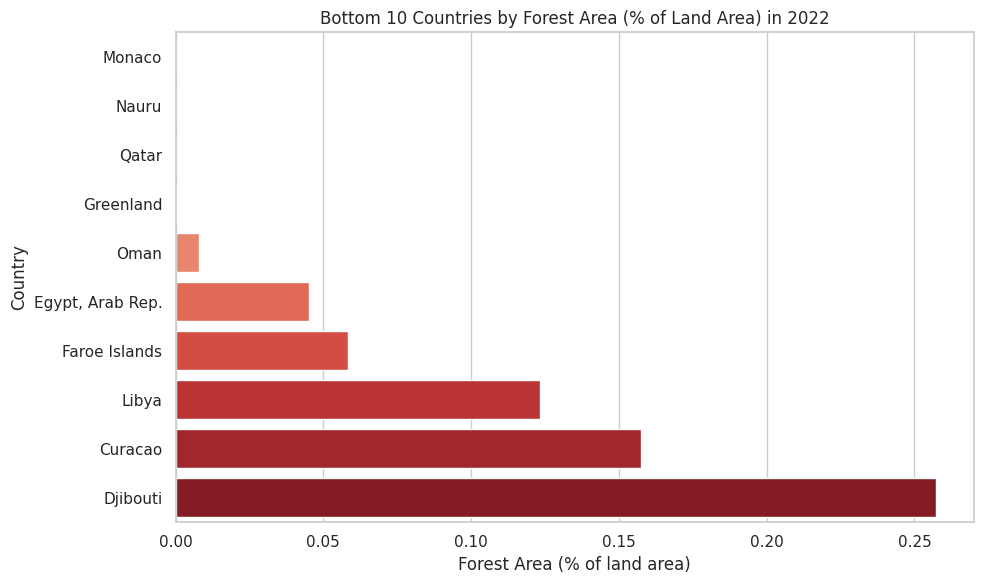

In [20]:
#| label: bottom_10
#| fig-cap: >
#|  This bar plot shows the 10 countries that had the lowest forest area percentage in the year 2022. We can see Monaco had the lowest forest area.
#|


#3. Bottom 10 Countries by Forest Area in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_2022, y="Country Name", x="Forest Area (% of land area)",
            hue="Country Name", palette="Reds", legend=False)
plt.title("Bottom 10 Countries by Forest Area (% of Land Area) in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

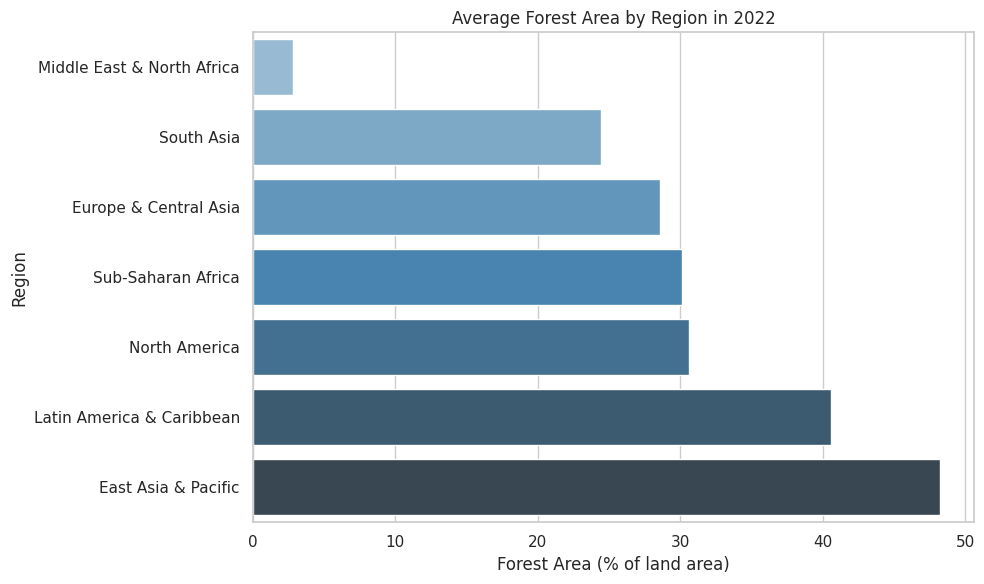

In [21]:
#| label: region_2022
#| fig-cap: >
#|  Here, we visualize the average forest area by region, specifically in the year of 2022. This follows the summary statistic stated before, where the East Asia & Pacific region had the highest average forest area over all years, and the Middle East & North Africa had the lowest.
#|

#4. Average Forest Area by Region in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_avg_2022.sort_values("Forest Area (% of land area)"),
            y="Region", x="Forest Area (% of land area)", hue="Region",
            palette="Blues_d", legend=False)
plt.title("Average Forest Area by Region in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

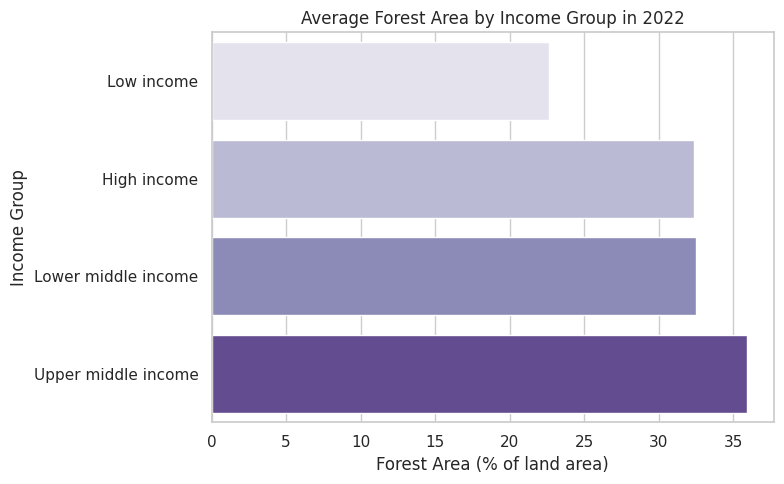

In [22]:
#| label: income_2022
#| fig-cap: >
#|  This bar plot shows the average forest area by income group, specifically in the year 2022. It is evident that the upper middle income group had the highest forest area during this year, while low income countries had the lowest. This could be due to lack of resources in low income countries, as well as infrastructure.
#|

# 5. Average Forest Area by Income Group in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(8, 5))
sns.barplot(data=income_avg_2022.sort_values("Forest Area (% of land area)"),
            y="IncomeGroup", x="Forest Area (% of land area)", hue="IncomeGroup",
            palette="Purples", legend=False)
plt.title("Average Forest Area by Income Group in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Income Group")
plt.tight_layout()
plt.show()

In [23]:
# Performance of prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = merged_df.copy()
df = pd.get_dummies(df, columns=['Region', 'IncomeGroup'], drop_first=True)

x = df.drop(columns=['Country Name', 'Country Code', 'Forest Area (% of land area)'])   # x is year, region, incomegroup
y = df['Forest Area (% of land area)']       # outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lmod = LinearRegression().fit(x_train, y_train)

y_pred = lmod.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

# High MSE, so the linear model was not the best to predict forest area
# R^2 = 0.26 means that only 25% of variance in Y (forest area), is explained in the independent vars

MSE:  455.3446307661934
R^2:  0.25952407318859005


In [24]:
# try with different x
df1 = merged_df.copy()
df2 = pd.get_dummies(df1, columns=['Region', 'IncomeGroup', 'Country Name', 'Country Code'], drop_first=True)

x2 = df2.drop(columns=['Forest Area (% of land area)'])   # x is name, code, year, region, incomegroup
y2 = df2['Forest Area (% of land area)']       # outcome

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

lmod = LinearRegression().fit(x_train, y_train)

y_pred = lmod.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

# This model is better, using different set of independent variables (x), with a lower MSE and higher R^2

MSE:  4.279687224962895
R^2:  0.9930404244384413


In [25]:
#| label: animated_2022
#| fig-cap: >
#|  This interactive map shows the amount of forest area around the world in the year 2022.

# Interactive Map: Forest Area in 2022

import plotly.express as px
import plotly.io as pio
import sys

# Automatically set renderer depending on environment (Colab or Jupyter)
if 'google.colab' in sys.modules:
    pio.renderers.default = "colab"
else:
    pio.renderers.default = "notebook"

# Filter data for 2022
map_data_2022 = merged_df[merged_df["Year"] == 2022].copy()

# Create Choropleth Map
fig = px.choropleth(
    map_data_2022,
    locations="Country Code",                    # ISO 3-letter country codes
    color="Forest Area (% of land area)",         # Color by forest %
    hover_name="Country Name",                    # Full country name on hover
    color_continuous_scale="Greens",               # Color scale (green shades)
    projection="natural earth",                   # Natural Earth projection
    title="Global Forest Area (% of Land Area) - 2022",
)

# Map Layout Adjustments
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    fitbounds="locations"
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Show the figure
fig.show()


In [26]:
#| label: animated_by_year
#| fig-cap: >
#|  In this interactive map, we can see the forest area percentages in each country over time.

#Animated map showing forest area year-by-year (1990–2022)!

import plotly.io as pio
import sys

# To Check if running in Colab
'''if 'google.colab' in sys.modules:
    pio.renderers.default = "colab"
else:
    pio.renderers.default = "notebook"
'''
fig = px.choropleth(
    merged_df,
    locations="Country Code",
    color="Forest Area (% of land area)",
    hover_name="Country Name",
    animation_frame="Year",
    color_continuous_scale="YlGn",
    range_color=(0, 100),
    projection="natural earth",
    title="Forest Area (% of Land Area) Over Time (1990–2022)"
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

fig.show()

fig.write_html("animated_by_year.html")
